Charge 1:
  Mean Squared Error (MSE): 9.296102e-74
  Mean Absolute Error (MAE): 1.636171e-37
  R² Score: 0.552619

Charge 2:
  Mean Squared Error (MSE): 5.739641e-73
  Mean Absolute Error (MAE): 5.713786e-37
  R² Score: 0.908299

Charge 3:
  Mean Squared Error (MSE): 2.467972e-72
  Mean Absolute Error (MAE): 1.252822e-36
  R² Score: 0.783346

Charge 4:
  Mean Squared Error (MSE): 5.913444e-72
  Mean Absolute Error (MAE): 1.700345e-36
  R² Score: 0.667145



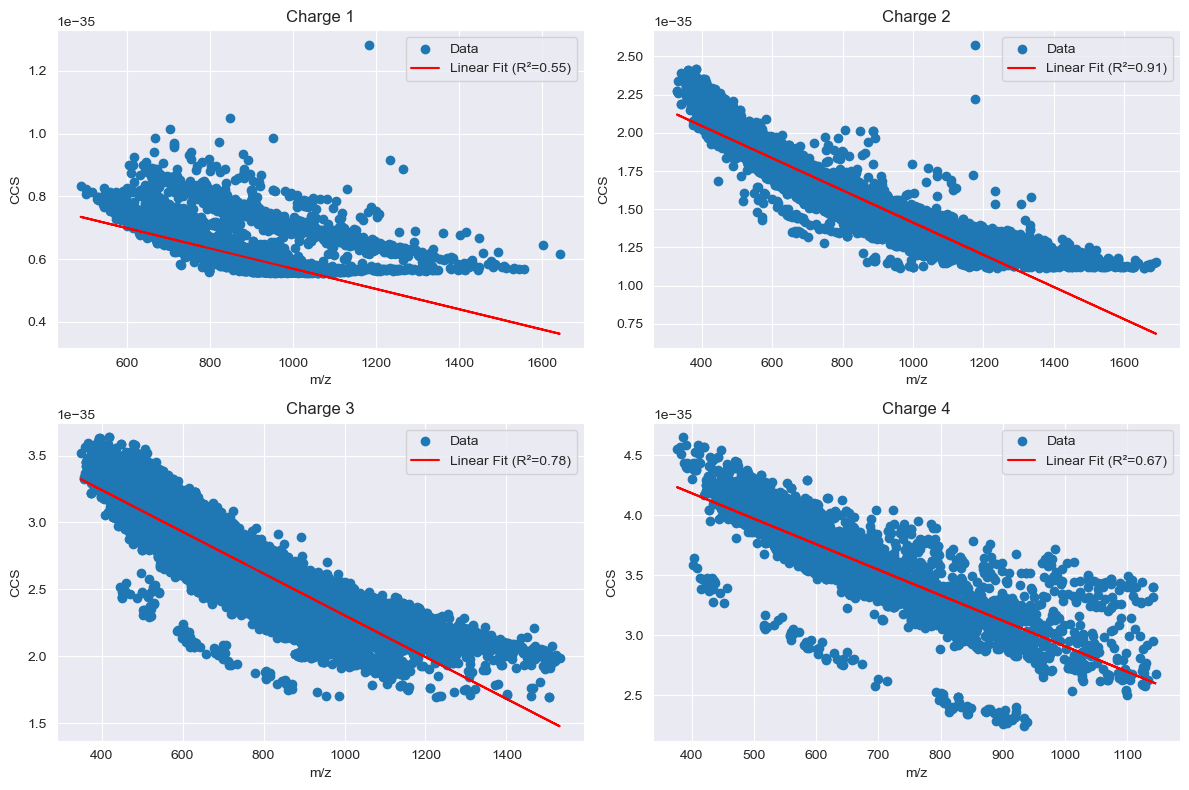

Charge 1: y = -0.000000 * x + 8.922333e-36
Charge 2: y = -0.000000 * x + 2.468086e-35
Charge 3: y = -0.000000 * x + 3.867301e-35
Charge 4: y = -0.000000 * x + 5.033589e-35


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os

# Load the dataset
data_path = "data/final_data_simplified.csv"  # Path to your CSV file
df = pd.read_csv(data_path)

# Clean the data
df = df.dropna()  # Remove rows with missing values
df["m/z"] = df["Mass"] / df["Charge"]  # Calculate mass-to-charge ratio

# Sort charges numerically and ensure consistent order
charge_groups = sorted(df["Charge"].unique())
models = {}

# Create a figure for scatter plots
plt.figure(figsize=(12, 8))

# Plot for each charge group in a 2x2 grid in the specified order
for i, charge in enumerate(charge_groups):
    # Determine subplot position (row-major order)
    row = i // 2  # Top row for 0 or 1, bottom for 2 or 3
    col = i % 2  # Left for 0 or 2, right for 1 or 3
    position = 2 * row + col + 1  # Subplot indexing starts at 1

    # Filter data by charge
    charge_data = df[df["Charge"] == charge]
    X = charge_data[["m/z"]].values
    y = charge_data["CCS"].values

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    models[charge] = model

    # Predict and evaluate
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    # Scatter plot and regression line
    plt.subplot(2, 2, position)
    plt.scatter(X, y, label="Data")
    plt.plot(X, y_pred, color="red", label=f"Linear Fit (R²={r2:.2f})")
    plt.title(f"Charge {charge}")
    plt.xlabel("m/z")
    plt.ylabel("CCS")
    plt.legend()

    # Print evaluation metrics for the current charge group
    print(f"Charge {charge}:")
    print(f"  Mean Squared Error (MSE): {mse:.6e}")
    print(f"  Mean Absolute Error (MAE): {mae:.6e}")
    print(f"  R² Score: {r2:.6f}")
    print()

# Adjust layout and save the plot
plt.tight_layout()
os.makedirs("pictures", exist_ok=True)  # Ensure the pictures folder exists
output_path = "pictures/charge_vs_ccs_plot_ordered.png"  # Path to save the plot
plt.savefig(output_path, dpi=300)
plt.show()

# Print model summary for each charge group
for charge, model in models.items():
    coef = model.coef_[0]
    intercept = model.intercept_
    print(f"Charge {charge}: y = {coef:.6f} * x + {intercept:.6e}")
